# ToyGl Physics Overview

This notebook-style script provides a compact, code-backed overview of the core physics implemented in ToyGl.
It is meant to be kept in sync with the Python source in `src/` and the Methods section of the manuscript.

**Contents**

1. Setup and imports from `src/`
2. Single filament (spring) mechanics
3. Cell pressure–volume relation
4. One explicit Euler time step on a single cell

In [1]:
# 1. Setup and imports from src/
import os, sys
import numpy as np
import matplotlib.pyplot as plt

# Ensure the project root (one level up from this notebook) is on the path
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

from src.node_class import Node
from src.filament_class import Filament
from src.cell_class import Cell
from src.eptm_class import Epithelium

print("Project root:", ROOT_DIR)

Project root: /home/ardati/PycharmProjects/toygl


## 2. Single filament (spring) mechanics

We create two nodes connected by a single filament and examine the elastic force as a function of filament length.

Initialising new filament number : 1, (0, 1) ...


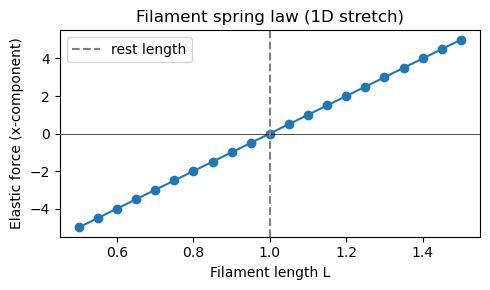

In [2]:
# Create two nodes on the x-axis
n1 = Node(position=[0.0, 0.0, 0.0])
n2 = Node(position=[1.0, 0.0, 0.0])

# Create a filament between them, using default properties
fil = Filament(node1=n1, node2=n2, cell_id=0)
fil.redefine_lfree()  # set rest length to the current length (1.0)
fil.properties['rig_EA'] = 10.0  # make stiffness explicit for clarity

# Scan different lengths by moving node 2 and computing the elastic force
lengths = np.linspace(0.5, 1.5, 21)
forces = []
for L in lengths:
    n2.position = np.array([L, 0.0, 0.0])
    f = fil.elastic_force()
    forces.append(f[0])  # x-component (only non-zero component here)

plt.figure(figsize=(5, 3))
plt.plot(lengths, forces, marker='o')
plt.axhline(0.0, color='k', linewidth=0.5)
plt.axvline(fil.lfree_new, color='gray', linestyle='--', label='rest length')
plt.xlabel('Filament length L')
plt.ylabel('Elastic force (x-component)')
plt.title('Filament spring law (1D stretch)')
plt.legend()
plt.tight_layout()
plt.show()

## 3. Cell pressure–volume relation

We create a single cell, measure its reference volume $V_0$, and then sample the
pressure computed by `Cell.calculate_pressure()` as we artificially scale the node positions
to generate smaller and larger volumes. This illustrates the linear pressure–volume law.

In [3]:
# Create a single cell and compute its reference volume V0
cell = Cell()
cell.redefine_volume0()  # sets cell.volume0 based on current geometry
V0 = cell.volume0
print("Reference volume V0:", V0)

# Helper to rescale all node positions (radial scaling about the origin)
def rescale_cell_nodes(cell, factor):
    for node in cell.get_nodes():
        node.position *= factor

# Sample different volume scales by scaling node positions and recomputing pressure
factors = np.linspace(0.8, 1.2, 17)  # scale factors on linear positions
volumes = []
pressures = []

# Reset to original configuration each time
for f in factors:
    c = Cell()
    c.redefine_volume0()
    rescale_cell_nodes(c, f)
    c.calculate_volume()
    c.calculate_pressure()
    volumes.append(c.volume)
    pressures.append(c.pressure)

plt.figure(figsize=(5, 3))
plt.plot(volumes, pressures, marker='o')
plt.axvline(V0, color='gray', linestyle='--', label='V0 (reference volume)')
plt.xlabel('Cell volume V')
plt.ylabel('Pressure p')
plt.title('Linear pressure–volume relation at cell level')
plt.legend()
plt.tight_layout()
plt.show()

Initialising new filament number : 2, (2, 13) ...
Initialising new filament number : 3, (13, 7) ...
Initialising new filament number : 4, (7, 2) ...
Filament with nodes 2 and 7 already exists. Initialization aborted.
Initialising new filament number : 5, (7, 3) ...
Initialising new filament number : 6, (3, 2) ...
Filament with nodes 2 and 3 already exists. Initialization aborted.
Initialising new filament number : 7, (3, 9) ...
Initialising new filament number : 8, (9, 2) ...
Filament with nodes 2 and 9 already exists. Initialization aborted.
Initialising new filament number : 9, (9, 12) ...
Initialising new filament number : 10, (12, 2) ...
Filament with nodes 2 and 12 already exists. Initialization aborted.
Initialising new filament number : 11, (12, 13) ...
Filament with nodes 13 and 2 already exists. Initialization aborted.
Filament with nodes 3 and 7 already exists. Initialization aborted.
Initialising new filament number : 12, (7, 11) ...
Initialising new filament number : 13, (1

Icosahedron intialisation
nodes : 12
facets_indices : [[0, 11, 5], [0, 5, 1], [0, 1, 7], [0, 7, 10], [0, 10, 11], [1, 5, 9], [5, 11, 4], [11, 10, 2], [10, 7, 6], [7, 1, 8], [3, 9, 4], [3, 4, 2], [3, 2, 6], [3, 6, 8], [3, 8, 9], [4, 9, 5], [2, 4, 11], [6, 2, 10], [8, 6, 7], [9, 8, 1]]
n123 : 0, 11 , 5
all_filaments : 3
n123 : 0, 5 , 1
all_filaments : 5
n123 : 0, 1 , 7
all_filaments : 7
n123 : 0, 7 , 10
all_filaments : 9
n123 : 0, 10 , 11
all_filaments : 10
n123 : 1, 5 , 9
all_filaments : 12
n123 : 5, 11 , 4
all_filaments : 14
n123 : 11, 10 , 2
all_filaments : 16
n123 : 10, 7 , 6
all_filaments : 18
n123 : 7, 1 , 8
all_filaments : 20
n123 : 3, 9 , 4
all_filaments : 23
n123 : 3, 4 , 2
all_filaments : 25
n123 : 3, 2 , 6
all_filaments : 27
n123 : 3, 6 , 8
all_filaments : 29
n123 : 3, 8 , 9
all_filaments : 30
n123 : 4, 9 , 5
all_filaments : 30
n123 : 2, 4 , 11
all_filaments : 30
n123 : 6, 2 , 10
all_filaments : 30
n123 : 8, 6 , 7
all_filaments : 30
n123 : 9, 8 , 1
all_filaments : 30
Number of

TypeError: Facet.__init__() missing 2 required positional arguments: 'filament2' and 'filament3'

## 4. One explicit Euler time step on a single cell

We now build a minimal `Epithelium` containing a single cell and perform one Euler time step.
This uses the same `Epithelium.state` and `Epithelium.derive_state` machinery as the full simulation.

In [4]:
# Initialize a simple epithelium with one growing cell
eptm = Epithelium()
eptm.create_an_eptm_of_a_growing_cells()

# Inspect initial state (positions and velocities)
state0 = eptm.state
positions0, velocities0 = state0
print("Initial positions shape:", positions0.shape, "velocities shape:", velocities0.shape)

# Perform one Euler step
t0 = 0.0
dt = 0.01
state1 = eptm.EulerOneD(state0.copy(), t0, dt)
eptm.state = state1  # write back into the object

positions1, velocities1 = state1

# Compare a few node positions before/after
for i in range(min(5, positions0.shape[0])):
    print(f'Node {i}: pos0 = {positions0[i]}, pos1 = {positions1[i]}')

Initialising new filament number : 32, (14, 25) ...
Initialising new filament number : 33, (25, 19) ...
Initialising new filament number : 34, (19, 14) ...
Filament with nodes 14 and 19 already exists. Initialization aborted.
Initialising new filament number : 35, (19, 15) ...
Initialising new filament number : 36, (15, 14) ...
Filament with nodes 14 and 15 already exists. Initialization aborted.
Initialising new filament number : 37, (15, 21) ...
Initialising new filament number : 38, (21, 14) ...
Filament with nodes 14 and 21 already exists. Initialization aborted.
Initialising new filament number : 39, (21, 24) ...
Initialising new filament number : 40, (24, 14) ...
Filament with nodes 14 and 24 already exists. Initialization aborted.
Initialising new filament number : 41, (24, 25) ...
Filament with nodes 25 and 14 already exists. Initialization aborted.
Filament with nodes 15 and 19 already exists. Initialization aborted.
Initialising new filament number : 42, (19, 23) ...
Initiali

Icosahedron intialisation
nodes : 12
facets_indices : [[0, 11, 5], [0, 5, 1], [0, 1, 7], [0, 7, 10], [0, 10, 11], [1, 5, 9], [5, 11, 4], [11, 10, 2], [10, 7, 6], [7, 1, 8], [3, 9, 4], [3, 4, 2], [3, 2, 6], [3, 6, 8], [3, 8, 9], [4, 9, 5], [2, 4, 11], [6, 2, 10], [8, 6, 7], [9, 8, 1]]
n123 : 0, 11 , 5
all_filaments : 3
n123 : 0, 5 , 1
all_filaments : 5
n123 : 0, 1 , 7
all_filaments : 7
n123 : 0, 7 , 10
all_filaments : 9
n123 : 0, 10 , 11
all_filaments : 10
n123 : 1, 5 , 9
all_filaments : 12
n123 : 5, 11 , 4
all_filaments : 14
n123 : 11, 10 , 2
all_filaments : 16
n123 : 10, 7 , 6
all_filaments : 18
n123 : 7, 1 , 8
all_filaments : 20
n123 : 3, 9 , 4
all_filaments : 23
n123 : 3, 4 , 2
all_filaments : 25
n123 : 3, 2 , 6
all_filaments : 27
n123 : 3, 6 , 8
all_filaments : 29
n123 : 3, 8 , 9
all_filaments : 30
n123 : 4, 9 , 5
all_filaments : 30
n123 : 2, 4 , 11
all_filaments : 30
n123 : 6, 2 , 10
all_filaments : 30
n123 : 8, 6 , 7
all_filaments : 30
n123 : 9, 8 , 1
all_filaments : 30
Number of

TypeError: Facet.__init__() missing 3 required positional arguments: 'filament1', 'filament2', and 'filament3'

This concludes the basic physics overview.

When new physical effects (forces, laws, integrators) are added to `src/`,
this notebook should be extended with additional cells that:

- call the same underlying functions/classes,
- visualise the new behaviour (plots, tables), and
- optionally provide small sanity checks (e.g. symmetry, sign of forces).